 # 📌ACTIVIDAD 2: MODELO DE REGRESIÓN LOGÍSTICA.
 ## PASO 1: CARGA DE DATOS Y CREACIÓN DEL MODELO.
 Crea el notebook saa_02_p04_a2_<tus_iniciales>.ipynb donde realizar esta actividad. Queremos
usar el fichero wine.csv para implementar un clasificador que nos indique el productor de la Toscana
(primera columna, pueden ser 3 y ya están codificados como 1, 2 y 3) a partir de parámetros obtenidos
de análisis químicos de sus vinos.

 En la práctica de la unidad 1 vimos que una manera de mejorar los datos era usar una técnica de
selección de características que consiste en realizar un estudio de sus propiedades estadísticas
individuales y por parejas, y así descubrir si algunas podían descartarse porque en vez de aportar
información lo que hacían era en el mejor de los casos estorbar y en otros confundir a los algoritmos
de aprendizaje al meter ruidos y hacerlos aprender mal. Ahora vamos a realizar algo parecido, pero
con otro enfoque. Primero vamos a construir el modelo y luego vamos a descubrir qué características
son las que más información aportan y cuales son prescindibles.

 a) Usa este código en el fichero saa_u02_p04_a2_<tus_iniciales>.py (o notebook) para cargar
los datos y completa el resto de apartados. Pero cuando particiones los datos y realices otras
operaciones donde intervenga el azar añade una semilla aleatoria para que el proceso sea
repetible (que coja los mismos datos, que evolucione igual, etc.):

In [5]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df_vino = pd.read_csv('../recursos/U02_P04/wine.csv', header=None)
df_vino.columns = ['Class', 'Alcohol', 'Ácido Málico', 'Posos',
                   'Alcalinidad de posos', 'Magnesio', 'Total Fenoles',
                   'Flavonoides', 'No flavonoides fenoles', 'Proantocianinas',
                   'Intensidad Color', 'Saturación',
                   'OD280/OD315 de vinos diluidos', 'Prolina']

print('Clases', np.unique(df_vino['Class']))
print(df_vino.head())

# Dividir en train + test
x, y = df_vino.iloc[:, 1:].values, df_vino.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

Clases [1 2 3]
   Class  Alcohol  Ácido Málico  Posos  Alcalinidad de posos  Magnesio  \
0      1    14.23          1.71   2.43                  15.6       127   
1      1    13.20          1.78   2.14                  11.2       100   
2      1    13.16          2.36   2.67                  18.6       101   
3      1    14.37          1.95   2.50                  16.8       113   
4      1    13.24          2.59   2.87                  21.0       118   

   Total Fenoles  Flavonoides  No flavonoides fenoles  Proantocianinas  \
0           2.80         3.06                    0.28             2.29   
1           2.65         2.76                    0.26             1.28   
2           2.80         3.24                    0.30             2.81   
3           3.85         3.49                    0.24             2.18   
4           2.80         2.69                    0.39             1.82   

   Intensidad Color  Saturación  OD280/OD315 de vinos diluidos  Prolina  
0              5.64  

b)
 Crea un objeto
multiclass.OneVsRestClassifier(LogisticRegression(..))
 el
método uno contra el resto
 y el solver
para que utilice
‘liblinear’
 (tienes ejemplos en la unidad, aunque en
las nuevas versiones de scikit-learn el parámetro
multi_class='ovr'
 fit()de
LogisticRegression
 del método
está marcado como deprecated), por este motivo te pido que uses esta
nueva clase.  Debes pasarle un objeto estimador que en este caso es uno de regresión logística.
Puedes acceder a ellos a través de


c)
 objeto_ovr.estimators_.
 Imprime los atributos
intercept_ y
coef_
 del modelo Lineal ¿Qué estás imprimiendo?

e)
 Entrena el modelo y muestra los valores de
la matriz de confusión
 y las métricas de eficiencia
(accuracy,
 recall positivo y negativo, sensitivity
 y F1-score)
 informe de clasificación donde aparezcan.

f)
 Muestra la
curva ROCy
el valor AUC
de cada clase y del modelo en global. Para hacerlo,
hay que
binarizar
 las predicciones (generando una columna con valores 0/1 para las
predicciones de cada clase) y obtener los
scores
 (distancia de cada predicción a cada clase) con
la función
decision_function()
 . Como posiblemente sea complicado, te paso el código para
que lo añadas a tu programa y respondas ¿En qué clase obtiene mejor y peor resultado?

In [6]:
from sklearn.linear_model import LogisticRegression  # Cambia esta importación
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Crear modelo OneVsRest con Regresión Logística
ovr = OneVsRestClassifier(LogisticRegression(solver='liblinear'))  # Agrega solver='liblinear'
ovr.fit(X_train, y_train)

# Imprimir coeficientes e interceptos
for i, estimator in enumerate(ovr.estimators_):
    print(f'Clase {i+1}: Intercepto: {estimator.intercept_}, Coeficientes: {estimator.coef_}')

# Predicciones
y_pred = ovr.predict(X_test)

# Evaluación
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Clase 1: Intercepto: [-0.21308473], Coeficientes: [[-0.5737885   0.60601665  0.67080456 -0.55174807 -0.04171455  0.45115613
   1.1024238  -0.01882281 -0.37831359  0.0101202  -0.15377748  0.75636884
   0.01801389]]
Clase 2: Intercepto: [0.28331937], Coeficientes: [[ 0.90730773 -0.99035579 -0.78646219  0.22685122 -0.00250002 -0.08542006
   0.46097593  0.12724951  1.04301194 -1.87094234  0.56693299  0.29088379
  -0.01170718]]
Clase 3: Intercepto: [-0.06580038], Coeficientes: [[-2.89163329e-01  4.91642316e-01  7.20852148e-02  8.78033714e-02
   2.83963418e-02 -4.50555426e-01 -1.67843987e+00  5.92596769e-03
  -8.30618667e-01  1.16934729e+00 -4.17451863e-01 -1.26948659e+00
  -1.44316888e-03]]
Matriz de Confusión:
[[18  1  0]
 [ 1 20  1]
 [ 0  0 13]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           1       0.95      0.95      0.95        19
           2       0.95      0.91      0.93        22
           3       0.93      1.00      0.96        13

  

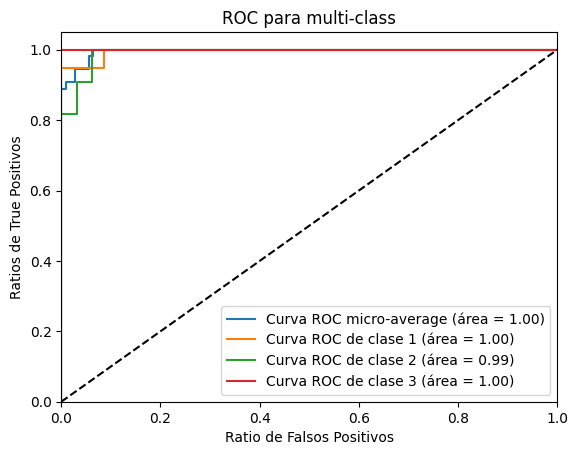

In [7]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

tpr = dict()
fpr = dict()
roc_auc = dict()

classes = df_vino['Class'].unique()  # Diferentes clases: diferentes valores de Class
n_classes = classes.shape[0]  # Cantidad de clases diferentes
y_test_bin = label_binarize(y_test, classes=[1, 2, 3])  # Binarizar el test
y_score = ovr.decision_function(X_test)  # Distancia a cada clase

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])  # Calcular AUC para cada clase

# micro-medias ROC y AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Dibujar la curva ROC
plt.figure()
plt.plot(fpr["micro"], tpr["micro"], label='Curva ROC micro-average (área = {0:0.2f})'.format(roc_auc["micro"]))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Curva ROC de clase {0} (área = {1:0.2f})'.format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ratio de Falsos Positivos')
plt.ylabel('Ratios de True Positivos')
plt.title('ROC para multi-class')
plt.legend(loc="lower right")
plt.show()


 ## PASO 2: MEJORAR MODELO
 Aunque el modelo funciona bastante bien usando regresión logística, vamos a intentar mejorarlo en
este paso usando técnicas de selección de características. El objetivo es detectar que columnas
podemos eliminar. En esta ocasión vamos a usar la regularización para detectar que características son
prescindibles.
### MEJORAR DATOS QUE ALIMENTAN AL ALGORITMO/MODELO
Y ahora vamos a entrenar un nuevo modelo usando la misma semilla aleatoria que antes, pero:


 g)
 ¿Qué significa
estratificar los datos
 método de particionar en
al hacer la división en
train + test
 train y test el parámetro  stratify=y




<span style=color:green;>Cuando usamos stratify=y en train_test_split, estamos asegurando que la distribución de clases en el conjunto de entrenamiento y prueba sea la misma que en el dataset original.<br>
Ejemplo<br>
Si tenemos 100 vinos en total, con las siguientes clases:<br>
Clase 1: 50 vinos<br>
Clase 2: 30 vinos<br>
Clase 3: 20 vinos</span>


 h)
 Utiliza un objeto
?  Añade en la llamada al
StandardScaler
 para estandarizar los datos de
train
 entrenar. ¿Porqué es interesante estandarizar los datos?

### USAR REGULARIZACIÓN L1
 Estamos usando un modelo con 13 predictoras. La regresión logística es propensa a sufrir de overfitting
si hay muchas predictoras. Vamos a usar regularización ℓ1 para que deje a 0 las características menos
importantes y al detectarlas poder eliminarlas del entrenamiento.


 i)
 Indica que quieres usar regularización de tipo ℓ
 1 y deja e
 l parámetro C= 1.0 ¿Qué ocurre si lo
bajas, aumenta o disminuye la fuerza de la regularización?


 j)
 Vuelve a imprimir los coeficientes y los puntos de intercepción.


 k)
 Como hemos usado una regularización de tipo ℓ
 1, nos habrá anulado las características
menos importantes. Vamos a aprovechar esto para mostrarlas ordenadas de mayor a menor
importancia. Haz un listado por consola donde aparezca el nombre de la característica, su
importancia con 4 decimales y la importancia acumulada (la suma de importancias desde la
más a la menos importante, una especie de ratio de importancia si usamos desde la primera
hasta la actual).

 Para calcular la importancia de cada variable, miramos su coeficiente (la pendiente que tiene el
hiperplano en esa variable, de manera que hacemos la suma del valor absoluto de las
pendientes). Ten en cuenta que como hay 3 clases (3 productores posibles), los coeficientes de
la recta son 3 filas y 13 columnas. Por simplificar, si hubiese 2 productores y 3 variables los
coeficientes podían ser algo así:


   [[-1  2,  3],
    [4, -5,  6]]
 Hay que generar la suma del valor absoluto de las pendientes (coeficientes), en el ejemplo de
arriba sería (lo calculo para que se comprendan las operaciones que debes hacer):


[1 + 4 , 2 + 5, 3 + 6] = [5, 7, 9]

 Ahora calculamos la importancia relativa para ello calculamos la suma:

5 + 7 + 9 = 21
y dividimos cada elemento por el total (21 en el ejemplo):

 [0.238, 0.333, 0.428]
 Si ordenamos los valores o sacamos el índice de los elementos ordenados con

    indice = np.argsort(pesos)  # Obtenemos [0,1,2] de menor a mayor, se invierte: [2, 1, 0]

 l)
 Y hacemos un gráfico de barras además de imprimir los valores. El resultado aproximado
que se debería obtener

<img src="../img/captura23.png" alt="captura23">

 m)
 Ahora elimina las características predictoras que se te han quedado con cero influencia y
compara el desempeño de los dos modelos. ¿Hay diferencias significativas?


Clase 1: Intercepto: [-1.26344299], Coeficientes: [[ 1.24613866  0.18063546  0.74606345 -1.16422399  0.          0.
   1.16002631  0.          0.          0.          0.          0.5580882
   2.50900089]]
Clase 2: Intercepto: [-1.21592463], Coeficientes: [[-1.53713915 -0.38752195 -0.99536596  0.36496031 -0.05946438  0.
   0.6676884   0.          0.         -1.93436479  1.23376953  0.
  -2.2314765 ]]
Clase 3: Intercepto: [-2.37029809], Coeficientes: [[ 0.1357358   0.16847091  0.3571095   0.          0.          0.
  -2.43817454  0.          0.          1.56347036 -0.81873043 -0.49237741
   0.        ]]

Matriz de Confusión:
[[18  0  0]
 [ 0 21  0]
 [ 0  0 15]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00

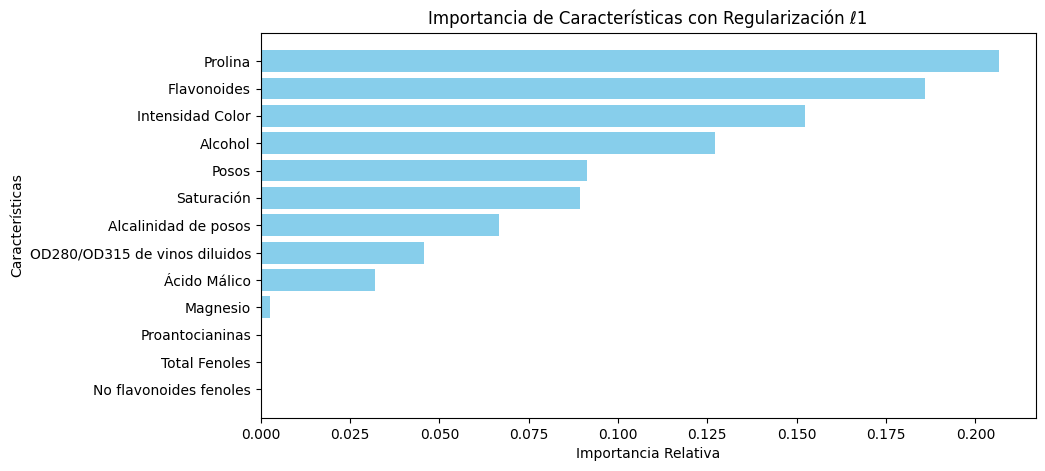


--- Evaluación del Modelo Reducido ---
Matriz de Confusión:
[[18  0  0]
 [ 0 21  0]
 [ 0  0 15]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Cargar datos
df_vino = pd.read_csv('../recursos/U02_P04/wine.csv', header=None)
df_vino.columns = ['Class', 'Alcohol', 'Ácido Málico', 'Posos', 'Alcalinidad de posos', 'Magnesio',
                   'Total Fenoles', 'Flavonoides', 'No flavonoides fenoles', 'Proantocianinas',
                   'Intensidad Color', 'Saturación', 'OD280/OD315 de vinos diluidos', 'Prolina']

# Particionar datos con estratificación
X, y = df_vino.iloc[:, 1:].values, df_vino.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

# Estandarización de datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear modelo con regularización ℓ1
ovr_l1 = OneVsRestClassifier(LogisticRegression(penalty='l1', solver='liblinear', C=1.0))
ovr_l1.fit(X_train, y_train)

# Imprimir coeficientes e interceptos
for i, estimator in enumerate(ovr_l1.estimators_):
    print(f'Clase {i+1}: Intercepto: {estimator.intercept_}, Coeficientes: {estimator.coef_}')

# Evaluar modelo con características completas
y_pred = ovr_l1.predict(X_test)
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# --- Selección de Características ---
coefs = np.array([estimator.coef_[0] for estimator in ovr_l1.estimators_])  # Matriz de coeficientes
feature_importance = np.sum(np.abs(coefs), axis=0)  # Sumar valores absolutos por columna
feature_importance /= feature_importance.sum()  # Normalizar

# Ordenar de mayor a menor importancia
indices = np.argsort(feature_importance)[::-1]
features_sorted = np.array(df_vino.columns[1:])[indices]
importance_sorted = feature_importance[indices]
importance_accum = np.cumsum(importance_sorted)  # Importancia acumulada

# Mostrar resultados
print("\nImportancia de características ordenadas:")
for i in range(len(features_sorted)):
    print(f"{features_sorted[i]}: {importance_sorted[i]:.4f}, Acumulado: {importance_accum[i]:.4f}")

# --- Gráfico de Importancia de Características ---
plt.figure(figsize=(10, 5))
plt.barh(features_sorted, importance_sorted, color='skyblue')
plt.xlabel('Importancia Relativa')
plt.ylabel('Características')
plt.title('Importancia de Características con Regularización ℓ1')
plt.gca().invert_yaxis()
plt.show()

# --- Eliminar Características con Coeficientes en Cero ---
X_train_reduced = X_train[:, feature_importance > 0]  # Filtrar columnas con importancia > 0
X_test_reduced = X_test[:, feature_importance > 0]

# Reentrenar con las características seleccionadas
ovr_l1_reduced = OneVsRestClassifier(LogisticRegression(penalty='l1', solver='liblinear', C=1.0))
ovr_l1_reduced.fit(X_train_reduced, y_train)
y_pred_reduced = ovr_l1_reduced.predict(X_test_reduced)

# Evaluación del modelo reducido
print("\n--- Evaluación del Modelo Reducido ---")
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_reduced))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_reduced))
